LIBRARIES

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import plotly as py
import cufflinks as cf

READ FILE

In [110]:
df = pd.read_csv('dirty_sample_500.csv')


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      480 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              480 non-null    float64
 7   Tool wear [min]          500 non-null    int64  
 8   Machine failure          500 non-null    int64  
 9   TWF                      500 non-null    int64  
 10  HDF                      500 non-null    int64  
 11  PWF                      500 non-null    int64  
 12  OSF                      500 non-null    int64  
 13  RNF                      500 non-null    int64  
dtypes: float64(3), int64(9), o

In [112]:
print(df.info())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      480 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              480 non-null    float64
 7   Tool wear [min]          500 non-null    int64  
 8   Machine failure          500 non-null    int64  
 9   TWF                      500 non-null    int64  
 10  HDF                      500 non-null    int64  
 11  PWF                      500 non-null    int64  
 12  OSF                      500 non-null    int64  
 13  RNF                      500 non-null    int64  
dtypes: float64(3), int64(9), o

DATA CLEANING

In [113]:
df.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,3724,L50903,L,302.3,311.2,1758,24.4,68,0,0,0,0,0,0
79,2021,H31434,H,298.7,308.4,1560,33.3,53,0,0,0,0,0,0
207,519,L47698,L,297.6,309.5,1924,20.6,37,0,0,0,0,0,0
130,6293,L53472,L,301.0,310.4,1614,31.6,84,0,0,0,0,0,0
291,7170,L54349,L,300.3,310.2,1492,52.3,2,0,0,0,0,0,0


In [114]:
print(df.isnull().sum())

UDI                         0
Product ID                  0
Type                        0
Air temperature [K]        20
Process temperature [K]     0
Rotational speed [rpm]      0
Torque [Nm]                20
Tool wear [min]             0
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
dtype: int64


In [115]:
drop_missing_value = df.dropna()
print(drop_missing_value)


      UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    6253     L53432    L                300.8                    310.3   
1    4685     M19544    M                303.6                    311.8   
2    1732     M16591    M                298.3                    307.9   
3    4743     L51922    L                303.3                    311.3   
4    4522     L51701    L                302.4                    310.4   
..    ...        ...  ...                  ...                      ...   
494  1632     L48811    L                298.0                    308.0   
496  7206     L54385    L                299.8                    309.7   
497  2523     M17382    M                298.8                    308.7   
498  2216     H31629    H                299.7                    309.2   
499  6969     L54148    L                300.9                    311.2   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                    

In [116]:
df_new = drop_missing_value #lưu vào bản dữ liệu mới sau khi xử lý missing data

In [117]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      480 non-null    int64  
 1   Product ID               480 non-null    object 
 2   Type                     480 non-null    object 
 3   Air temperature [K]      480 non-null    float64
 4   Process temperature [K]  480 non-null    float64
 5   Rotational speed [rpm]   480 non-null    int64  
 6   Torque [Nm]              480 non-null    float64
 7   Tool wear [min]          480 non-null    int64  
 8   Machine failure          480 non-null    int64  
 9   TWF                      480 non-null    int64  
 10  HDF                      480 non-null    int64  
 11  PWF                      480 non-null    int64  
 12  OSF                      480 non-null    int64  
 13  RNF                      480 non-null    int64  
dtypes: float64(3), int64(9), object

In [118]:
print(df_new.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [119]:
df_new.to_csv("cleaned.csv",index=False, encoding="utf-8-sig")

In [120]:
df = pd.read_csv("cleaned.csv")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      480 non-null    int64  
 1   Product ID               480 non-null    object 
 2   Type                     480 non-null    object 
 3   Air temperature [K]      480 non-null    float64
 4   Process temperature [K]  480 non-null    float64
 5   Rotational speed [rpm]   480 non-null    int64  
 6   Torque [Nm]              480 non-null    float64
 7   Tool wear [min]          480 non-null    int64  
 8   Machine failure          480 non-null    int64  
 9   TWF                      480 non-null    int64  
 10  HDF                      480 non-null    int64  
 11  PWF                      480 non-null    int64  
 12  OSF                      480 non-null    int64  
 13  RNF                      480 non-null    int64  
dtypes: float64(3), int64(9), o

In [122]:
df['Type'].unique()

array(['L', 'M', 'H', 'L ', '??', 'h', 'm', 'HIGH'], dtype=object)

In [123]:
df['Type'].value_counts()

Type
L       307
M       127
H        41
L         1
??        1
h         1
m         1
HIGH      1
Name: count, dtype: int64

In [124]:
df['Type'] = df['Type'].replace({'h' : 'H', 'm' : 'M', 'l' : 'L'}) # chuyển chữ thường thành chữ in hoa

#Giữ lại các giá trij hợp lệ  L, M, H
valid_type = ['L', 'M', 'H']
df = df[df['Type'].isin(valid_type)].reset_index(drop=True)
df.to_csv('cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      477 non-null    int64  
 1   Product ID               477 non-null    object 
 2   Type                     477 non-null    object 
 3   Air temperature [K]      477 non-null    float64
 4   Process temperature [K]  477 non-null    float64
 5   Rotational speed [rpm]   477 non-null    int64  
 6   Torque [Nm]              477 non-null    float64
 7   Tool wear [min]          477 non-null    int64  
 8   Machine failure          477 non-null    int64  
 9   TWF                      477 non-null    int64  
 10  HDF                      477 non-null    int64  
 11  PWF                      477 non-null    int64  
 12  OSF                      477 non-null    int64  
 13  RNF                      477 non-null    int64  
dtypes: float64(3), int64(9), o

In [125]:
df['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [126]:
print((df['Air temperature [K]'] < 0).any()) #kiểm tra có giá trị âm không
(df['Air temperature [K]'] < 0).sum() # Tổng giá trị âm có trong cột





True


np.int64(1)

In [127]:
print((df['Process temperature [K]'] < 0).any())

False


In [128]:
print((df['Rotational speed [rpm]'] < 0).any())

False


In [129]:
print((df['Torque [Nm]'] < 0).any())

False


In [130]:
cols_abs = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[cols_abs] = df[cols_abs].abs() #loại bỏ dấu âm
df.to_csv('cleaned.csv')
df = pd.read_csv('cleaned.csv')


In [131]:
print((df['Air temperature [K]'] < 0).any())

False


In [132]:
df['Process temperature [K]'].unique()

array([310.3, 311.8, 307.9, 311.3, 310.4, 309.9, 309.7, 312.7, 309.6,
       309.2, 311.7, 313. , 311. , 310.9, 308.3, 310.8, 309.3, 308.5,
       311.2, 308.7, 307.5, 310.7, 308.9, 309.5, 311.9, 308.2, 311.4,
       310.5, 309.1, 312.2, 310.6, 312.9, 309.8, 310. , 309. , 308.6,
       308.4, 308.8, 307.8, 306.2, 312.6, 311.5, 313.1, 312.4, 311.6,
       307.7, 308.1, 308. , 310.1, 312.3, 310.2, 313.2, 309.4, 312. ,
       307.1, 311.1, 312.5, 306.5, 312.8, 306.4, 307.4, 312.1, 307.6,
       313.4, 313.5])

In [133]:
df['Air temperature [K]'].unique()

array([300.8, 303.6, 298.3, 303.3, 302.4, 300.5, 297.7, 303.7, 300. ,
       299.7, 300.3, 302. , 300.6, 297.8, 299.6, 298.8, 299.2, 303.1,
       298.9, 298.5, 299.1, 301.7, 297.5, 299.8, 303. , 303.8, 298.6,
       301.6, 302.5, 298. , 302.3, 298.1, 300.1, 297.3, 301. , 300.9,
       299. , 303.4, 297. , 301.8, 912.6, 300.7, 297.6, 298.7, 295.5,
       301.3, 300.4, 299.9, 298.2, 296.8, 297.9, 300.2, 304. , 299.5,
       297.4, 302.1, 296.6, 297.1, 296.9, 301.9, 301.4, 301.1, 302.6,
       303.5, 303.9, 302.2, 299.3, 296.1, 295.8, 299.4, 297.2, 298.4,
       301.5, 302.8, 296.5, 301.2, 302.9, 302.7, 296.4, 304.2])

In [134]:
cols_to_clean = ['Process temperature [K]', 'Air temperature [K]']

for col in cols_to_clean:
    df[col] = df[col].round(1)
    df[col] = df[col].apply(lambda x: float(f"{x:.1f}"))

df.to_csv('cleaned.csv', index=False)
df = pd.read_csv('cleaned.csv')


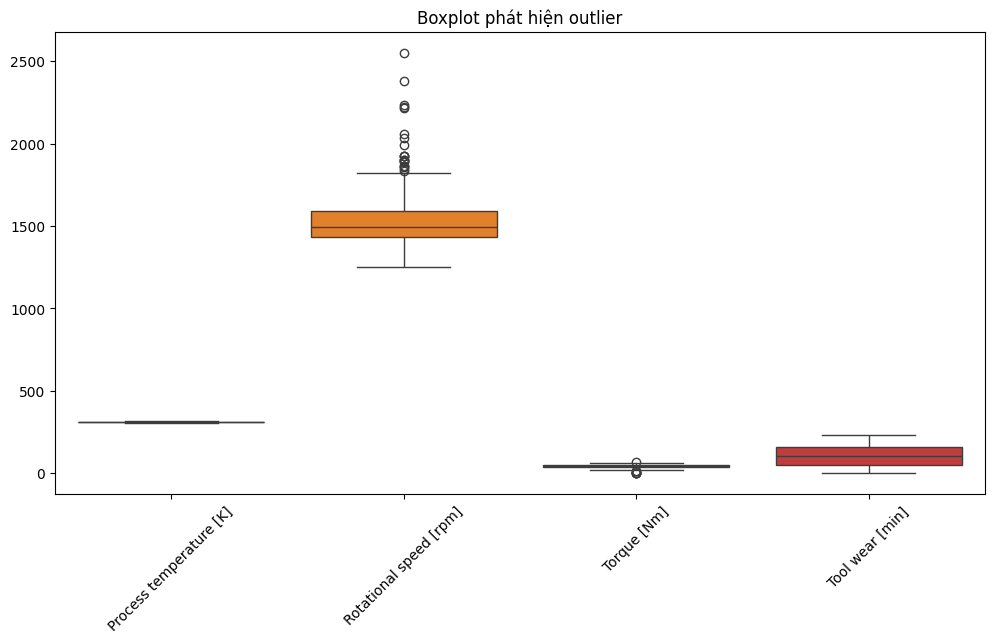

In [135]:
#vẽ biểu đồ kiểm tra outlier
cols_plot = ['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 6))
sb.boxplot(data=df[cols_plot])
plt.xticks(rotation=45)
plt.title('Boxplot phát hiện outlier')
plt.show()

In [136]:
df = pd.read_csv('cleaned.csv')

#Capping outlier bằng IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

cols_cap = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for col in cols_cap:
    df = cap_outliers(df, col)

# Lưu dữ liệu đã clean
df.to_csv('cleaned.csv', index=False)

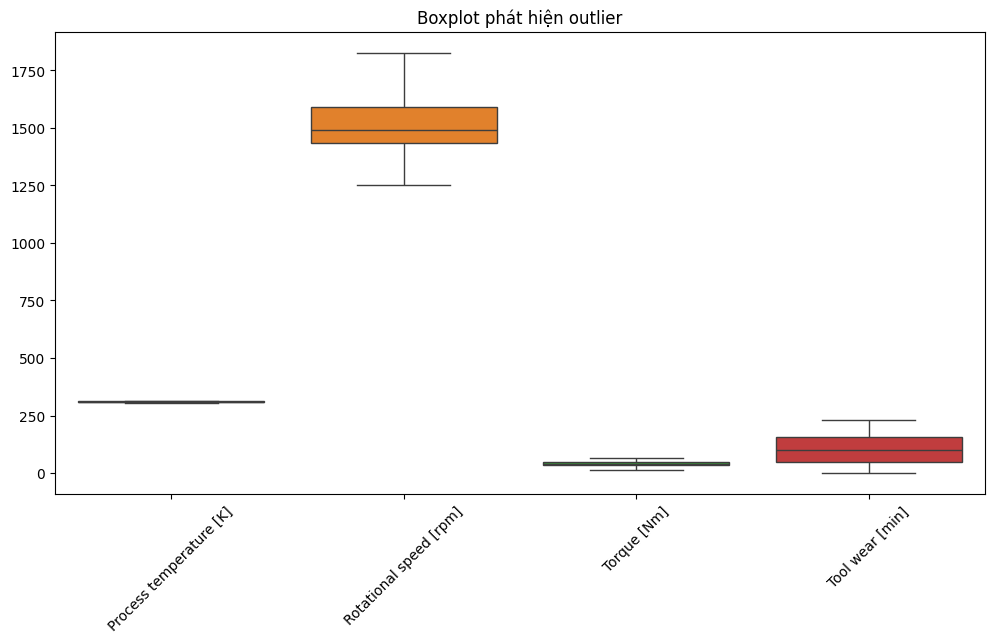

In [137]:
#vẽ biểu đồ kiểm tra outlier
cols_plot = ['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 6))
sb.boxplot(data=df[cols_plot])
plt.xticks(rotation=45)
plt.title('Boxplot phát hiện outlier')
plt.show()